# Import 

In [370]:
# Data structure libraries
import pandas as pd
import numpy as np

# ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KernelDensity

# Math libraries
from statistics import mean 

# Visualization libraries
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset

In [371]:
sleep_data = pd.read_csv('./Data/processed_data_II.csv')

# Data Preprocessing

In [372]:
def normalize_feature(feature_to_normalize, max_val, min_val) :
    feature_length = len(feature_to_normalize)
    normalized = []
    for i in range(feature_length) :
        normalized.append(((feature_to_normalize[i] - min_val) / (max_val - min_val)))
    return normalized

In [373]:
# Removing unnamed column
sleep_data = sleep_data.loc[:, ~sleep_data.columns.str.contains('^Unnamed')]

In [374]:
# Removing SEQN
sleep_data = sleep_data.loc[:, ~sleep_data.columns.str.contains('SEQN')]

In [375]:
# Rearrange columns
new_cols = ['RIAGENDR', 'RIDAGEYR', 'SLQ040', 'SLQ050', 'DPQ020', 'DPQ030', 'DPQ040', 'BMXBMI',
                      'DR1IMAGN', 'DR1IIRON', 'DR1ISFAT', 'DR1IPFAT', 'DR1IMFAT', 
                      'DR2IMAGN', 'DR2IIRON', 'DR2ISFAT', 'DR2IPFAT', 'DR2IMFAT',
                      'SLD012', 'SLQ120', 'sleep_disorder']

sleep_data = sleep_data[new_cols]

# Normalize data
maxList = sleep_data.max()
minList = sleep_data.min()

# Lists that store the normalized values
RIAGENDR_norm = normalize_feature(sleep_data['RIAGENDR'].values.tolist(), maxList[0], minList[0])
RIDAGEYR_norm = normalize_feature(sleep_data['RIDAGEYR'].values.tolist(), maxList[1], minList[1])
SLQ040_norm = normalize_feature(sleep_data['SLQ040'].values.tolist(), maxList[2], minList[2])
SLQ050_norm = normalize_feature(sleep_data['SLQ050'].values.tolist(), maxList[3], minList[3])

DPQ020_norm = normalize_feature(sleep_data['DPQ020'].values.tolist(), maxList[4], minList[4])
DPQ030_norm = normalize_feature(sleep_data['DPQ030'].values.tolist(), maxList[5], minList[5])
DPQ040_norm = normalize_feature(sleep_data['DPQ040'].values.tolist(), maxList[6], minList[6])

BMXBMI_norm = normalize_feature(sleep_data['BMXBMI'].values.tolist(), maxList[7], minList[7])

DR1IMAGN_norm = normalize_feature(sleep_data['DR1IMAGN'].values.tolist(), maxList[8], minList[8])
DR1IIRON_norm = normalize_feature(sleep_data['DR1IIRON'].values.tolist(), maxList[9], minList[9])

DR1ISFAT_norm = normalize_feature(sleep_data['DR1ISFAT'].values.tolist(), maxList[10], minList[10])
DR1IPFAT_norm = normalize_feature(sleep_data['DR1IPFAT'].values.tolist(), maxList[11], minList[11])
DR1IMFAT_norm = normalize_feature(sleep_data['DR1IMFAT'].values.tolist(), maxList[12], minList[12])
DR2IMAGN_norm = normalize_feature(sleep_data['DR2IMAGN'].values.tolist(), maxList[13], minList[13])

DR2IIRON_norm = normalize_feature(sleep_data['DR2IIRON'].values.tolist(), maxList[14], minList[14])
DR2ISFAT_norm = normalize_feature(sleep_data['DR2ISFAT'].values.tolist(), maxList[15], minList[15])
DR2IPFAT_norm = normalize_feature(sleep_data['DR2IPFAT'].values.tolist(), maxList[16], minList[16])
DR2IMFAT_norm = normalize_feature(sleep_data['DR2IMFAT'].values.tolist(), maxList[17], minList[17])

SLD012_norm = normalize_feature(sleep_data['SLD012'].values.tolist(), maxList[18], minList[18])
SLQ120_norm = normalize_feature(sleep_data['SLQ120'].values.tolist(), maxList[19], minList[19])

sleep_disorder_norm = normalize_feature(sleep_data['sleep_disorder'].values.tolist(), maxList[20], minList[20])

# Create a new dataframe with the normalized values
normalized_features = {
         'RIAGENDR': RIAGENDR_norm,
         'RIDAGEYR': RIDAGEYR_norm, 
         'SLQ040': SLQ040_norm,
         'SLQ050': SLQ050_norm,
         'DPQ020': DPQ020_norm,
         'DPQ030': DPQ030_norm,
         'DPQ040': DPQ040_norm,
         'BMXBMI': BMXBMI_norm,
         'DR1IMAGN': DR1IMAGN_norm,
         'DR1IIRON': DR1IIRON_norm, 
         'DR1ISFAT': DR1ISFAT_norm,
         'DR1IPFAT': DR1IPFAT_norm,
         'DR1IMFAT': DR1IMFAT_norm,
         'DR2IMAGN': DR2IMAGN_norm,
         'DR2IIRON': DR2IIRON_norm, 
         'DR2ISFAT': DR2ISFAT_norm,
         'DR2IPFAT': DR2IPFAT_norm,
         'DR2IMFAT': DR2IMFAT_norm,
         'SLD012': SLD012_norm,
         'SLQ120': SLQ120_norm,
         'sleep_disorder': sleep_disorder_norm}

In [376]:
# Convert dictionary into dataframe
norm_df = pd.DataFrame.from_dict(normalized_features)

In [377]:
# Drop columns that are already hot encoded, or not helpful
norm_df = norm_df.drop(columns=['RIAGENDR', 'SLQ040', 'SLQ050', 'DPQ030'])

In [378]:
print(norm_df.columns)

Index(['RIDAGEYR', 'DPQ020', 'DPQ040', 'BMXBMI', 'DR1IMAGN', 'DR1IIRON',
       'DR1ISFAT', 'DR1IPFAT', 'DR1IMFAT', 'DR2IMAGN', 'DR2IIRON', 'DR2ISFAT',
       'DR2IPFAT', 'DR2IMFAT', 'SLD012', 'SLQ120', 'sleep_disorder'],
      dtype='object')


#  Investigating potiential non linear relationships via basis function

Basis functions work in tangent with regression models. That means that the outputs are continues variables. We are a classification model, so we have a binary label. Which means we cannot use our label when computing R^2. An alternative solution is to investigate potiential non linear relationships between feature variables to get a better sense at how the variable interact with each other. 

In [379]:
invest_cols = ['BMXBMI', 'SLD012']

invest_data = norm_df[invest_cols]
print(invest_data.columns)

Index(['BMXBMI', 'SLD012'], dtype='object')


In [404]:
# All feature data
features = invest_data.iloc[:,:-1]
# All label data
labels = invest_data.iloc[:,-1:]

# Using the remaining training records, split into validation, slightly larger split to make it comparable to test size
og_feature_train, feature_val, og_label_train, label_val = train_test_split(features, labels, test_size=0.1)


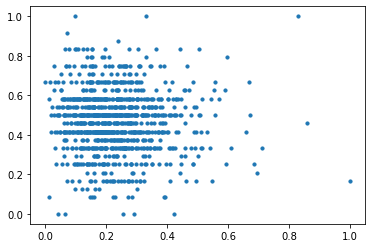

In [381]:
plt.scatter(og_feature_train, og_label_train, s = 10)
plt.show()

Generally, the reason why our model struggles is because it appears the features don't have much association with each other. They are all relatively independent.

In [132]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(og_feature_train, og_label_train)

# Make predictions using the testing set
y_pred = regr.predict(feature_val)

# The mean squared error
print('Mean squared error: ', mean_squared_error(label_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(label_val, y_pred))

Mean squared error:  0.02221696246023245
Coefficient of determination:  0.015454493128627678


There is definitely is a nonlinear relationship between the features and the labels. 

In [133]:
# Fit a non-liner model using SVR()

# We are going to use radial basis function
rbf_model = SVR(kernel = 'rbf', C=100, epsilon=1)
rbf_model.fit(og_feature_train, og_label_train.values.ravel())

# Make predictions using the testing set
y_pred = rbf_model.predict(feature_val)

# The mean squared error
print('Mean squared error: ', mean_squared_error(label_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(label_val, y_pred))

Mean squared error:  0.023848684210526317
Coefficient of determination:  -0.05685531612597683


# Train - Validation Split

In [407]:
# All feature data
features = norm_df.iloc[:,:-1]
# All label data
labels = norm_df.iloc[:,-1:]

# Using the remaining training records, split into validation, slightly larger split to make it comparable to test size
og_feature_train, feature_val, og_label_train, label_val = train_test_split(features, labels, test_size=0.1)
feature_train_dump, feature_test, label_train_dump, label_test = train_test_split(og_feature_train, og_label_train, test_size=0.1)
# In the end, we get 3 groups:

print(og_feature_train.columns)

# feature_train
# label_train

# feature_test
# label_test

# feature_validation
# label_validation

Index(['RIDAGEYR', 'DPQ020', 'DPQ040', 'BMXBMI', 'DR1IMAGN', 'DR1IIRON',
       'DR1ISFAT', 'DR1IPFAT', 'DR1IMFAT', 'DR2IMAGN', 'DR2IIRON', 'DR2ISFAT',
       'DR2IPFAT', 'DR2IMFAT', 'SLD012', 'SLQ120'],
      dtype='object')


# Density Estimation Removal (Rank Removal)

In [383]:
def rank_removal(x_train, y_train, feature_col, y_col, rank_threshold) :
    '''
        :param x_train: the np array of learning data
        :param y_train: the np array of labels for learning data
        :param feature_col: actual column names []
        :param y_col: the label column
        :param rank_threshold: the percentage of data we want to drop (like 0.30 to keep the top 70% of the data)
        :returns x_train_df, y_train_df, x_train, y_train, rows_to_drop: returns the dataframe versions of the remaining rows after removal, as well as the indicies of the rows dropped
    '''
    # Convert to 2d tabular data
    x_train_df = pd.DataFrame(x_train, columns = feature_col)
    y_train_df = pd.DataFrame(y_train, columns = [y_col])
    
    # Fit the data for the kernel
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(x_train_df)
    # Caculate the probability density 
    logprob = kde.score_samples(x_train_df)

    # Drop the bottom k%, keeping the top k%
    perc = rank_threshold
    perc = int(len(logprob) * perc)

    print('Drop Bottom ' + str(rank_threshold * 100) + '%')
    rows_to_drop = np.argpartition(logprob, perc)[:perc]
    print('Number of rows dropped: ', str(len(rows_to_drop)))
    
    x_train_df = x_train_df.drop(rows_to_drop, axis=0)
    y_train_df = y_train_df.drop(rows_to_drop, axis=0)
    
    return x_train_df, y_train_df, rows_to_drop

In [408]:
feature_col = ['RIDAGEYR', 'DPQ020', 'DPQ040', 'BMXBMI', 'DR1IMAGN', 'DR1IIRON', 'DR1ISFAT',
               'DR1IPFAT', 'DR1IMFAT', 'DR2IMAGN', 'DR2IIRON', 'DR2ISFAT', 'DR2IPFAT',
               'DR2IMFAT', 'SLD012', 'SLQ120']
y_col = ['sleep_disorder']

In [409]:
maj_rank_threshold = 0.50
min_rank_threshold = 0.10

temp1 = og_feature_train.copy()
temp1['sleep_disorder'] = og_label_train
temp_neg = temp1[temp1['sleep_disorder'] == 0]
temp_pos = temp1[temp1['sleep_disorder'] == 1]

#print(len(og_feature_train))
#print(len(temp_neg))
#print(len(temp_pos))

# KDE on each class
feature_train_maj, label_train_maj, rows_dropped_maj = rank_removal(np.array(temp_neg.iloc[:,:-1]), 
                                                                    np.array(og_label_train[og_label_train['sleep_disorder'] == 0.0]), 
                                                                    feature_col, y_col, min_rank_threshold)
feature_train_min, label_train_min, rows_dropped_min = rank_removal(np.array(temp_pos.iloc[:,:-1]), 
                                                                    np.array(og_label_train[og_label_train['sleep_disorder'] == 1.0]), 
                                                                    feature_col, y_col, maj_rank_threshold)

# Combine the classes in both feature and label df
feature_train = feature_train_maj.append(feature_train_min, ignore_index=True)
label_train = label_train_maj.append(label_train_min, ignore_index=True)

# Add the label to the feaure df
feature_train['sleep_disorder'] = label_train

# Shuffle
feature_train = feature_train.sample(frac=1)

# Separate feature and label df, get the label column first
label_train = feature_train.iloc[:,-1:]
feature_train = feature_train.iloc[:,:-1]

Drop Bottom 10.0%
Number of rows dropped:  29
Drop Bottom 50.0%
Number of rows dropped:  365


/var/folders/9y/397btn495pd3_pbvzx814v7m0000gn/T/ipykernel_19847/654858194.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_train = feature_train_maj.append(feature_train_min, ignore_index=True)
/var/folders/9y/397btn495pd3_pbvzx814v7m0000gn/T/ipykernel_19847/654858194.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label_train = label_train_maj.append(label_train_min, ignore_index=True)


# Hyperparameter Tuning

In [386]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
c_range = np.geomspace(start=0.001, stop=20, num=100)

for c in c_range:
    # Hyperparameter is the number of regularization strength (C), l2 by default
    model = LogisticRegression(solver='liblinear', C=c, random_state=0)
    
    # Learn the model over the training data
    model.fit(feature_train, label_train.values.ravel())

    # Predict labels over the validation data
    model.predict(feature_val)
    
    #print(label_val.head(1))
    #print(model.predict(feature_val))

    # Evaluate accuracy over the validation data
    accuracy_list.append(accuracy_score(label_val, model.predict(feature_val)))
    precision_list.append(precision_score(label_val, model.predict(feature_val)))
    recall_list.append(recall_score(label_val, model.predict(feature_val)))
    f1_list.append(f1_score(label_val, model.predict(feature_val)))

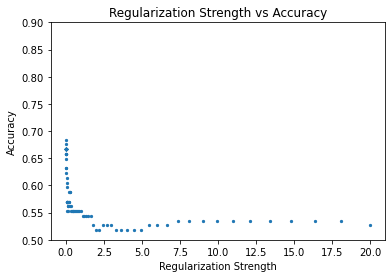

In [400]:
plt.scatter(c_range, accuracy_list, s = 5)

plt.title('Regularization Strength vs Accuracy')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.9)


plt.show()

(0.5, 0.9)

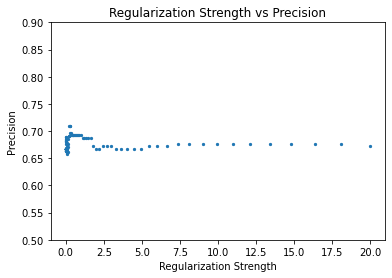

In [389]:
plt.scatter(c_range, precision_list, s=5)
plt.title('Regularization Strength vs Precision')
plt.xlabel('Regularization Strength')
plt.ylabel('Precision')
plt.ylim(0.5, 0.9)

(0.5, 0.9)

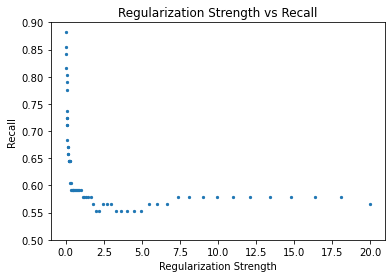

In [390]:
plt.scatter(c_range, recall_list, s=5)
plt.title('Regularization Strength vs Recall')
plt.xlabel('Regularization Strength')
plt.ylabel('Recall')
plt.ylim(0.5, 0.9)

(0.5, 0.9)

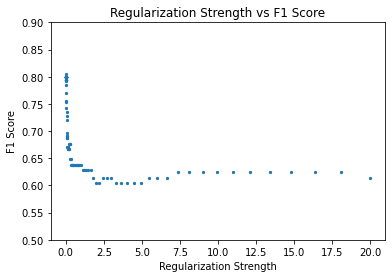

In [391]:
plt.scatter(c_range, f1_list, s=5)
plt.title('Regularization Strength vs F1 Score')
plt.xlabel('Regularization Strength')
plt.ylabel('F1 Score')
plt.ylim(0.5, 0.9)

In [343]:
best_accuracy = max(accuracy_list)
best_accuracy_index = accuracy_list.index(best_accuracy)
best_c = c_range[best_accuracy_index]

In [344]:
print('Best Accuracy: ', best_accuracy)
print('Best regularization value', best_c)

Best Accuracy:  0.7719298245614035
Best regularization value 0.02222220605985998


# Logistic Regression

In [392]:
# Hyperparameter is the number of regularization strength (C), l2 by default
model = LogisticRegression(solver='liblinear', C=best_c, random_state=0)

# Learn the model over the training data
model.fit(feature_train, label_train.values.ravel())

# Predict labels over the testing data
model.predict(feature_test)

array([0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

# Interpret Results

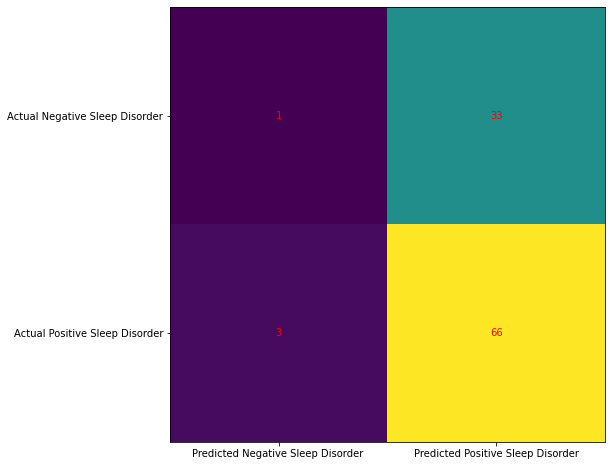

In [393]:
cm = confusion_matrix(label_test, model.predict(feature_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Negative Sleep Disorder ', 'Predicted Positive Sleep Disorder'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Negative Sleep Disorder', 'Actual Positive Sleep Disorder'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [394]:
print(classification_report(label_test, model.predict(feature_test)))

              precision    recall  f1-score   support

         0.0       0.25      0.03      0.05        34
         1.0       0.67      0.96      0.79        69

    accuracy                           0.65       103
   macro avg       0.46      0.49      0.42       103
weighted avg       0.53      0.65      0.54       103



# Driver (to run entire experiment over k iterations, if needed)

In [413]:
avg_acc = []

avg_prec_maj = []
avg_recall_maj = []
avg_f1_maj = []

avg_prec_min = []
avg_recall_min = []
avg_f1_min = []

for i in range (50) :
    feature_train_dump, feature_test, label_train_dump, label_test = train_test_split(og_feature_train, og_label_train, test_size=0.1)

    # Hyperparameter is the number of regularization strength (C), l2 by default
    model = LogisticRegression(solver='liblinear', C=best_c, random_state=0)

    # Learn the model over the training data
    model.fit(feature_train, label_train.values.ravel())

    # Predict labels over the testing data
    model.predict(feature_test)

    report = classification_report(label_test, model.predict(feature_test), output_dict=True)
    
    # Evaluate accuracy over the testing data
    avg_acc.append(report['accuracy'])
    
    
    maj_precision = report['1.0']['precision'] 
    maj_recall = report['1.0']['recall']    
    maj_f1 = report['1.0']['f1-score']
    
    min_precision = report['0.0']['precision'] 
    min_recall = report['0.0']['recall']    
    min_f1 = report['0.0']['f1-score']
    
    avg_prec_maj.append(maj_precision)
    avg_recall_maj.append(maj_recall)
    avg_f1_maj.append(maj_f1)
    
    avg_prec_min.append(min_precision)
    avg_recall_min.append(min_recall)
    avg_f1_min.append(min_f1)
    

/Users/petertran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/petertran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/petertran/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

In [414]:
print(mean(avg_acc))
print(mean(avg_prec_maj))
print(mean(avg_recall_maj))
print(mean(avg_f1_maj))
print(mean(avg_prec_min))
print(mean(avg_recall_min))
print(mean(avg_f1_min))

0.6998058252427185
0.7080445908724631
0.9796226322762611
0.8213883215466518
0.276
0.021720063190549758
0.03959585328620069


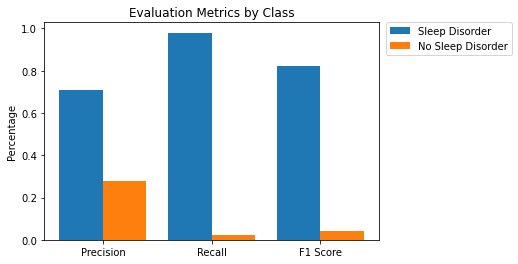

In [415]:
# Saved mean metrics from i = 20 iterations above
X = ['Precision','Recall','F1 Score'] 
majority = [mean(avg_prec_maj), mean(avg_recall_maj), mean(avg_f1_maj)] 
minority = [mean(avg_prec_min), mean(avg_recall_min), mean(avg_f1_min)] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, majority, 0.4, label = 'Sleep Disorder') 
plt.bar(X_axis + 0.2, minority, 0.4, label = 'No Sleep Disorder') 
  
plt.xticks(X_axis, X) 
plt.ylabel('Percentage') 
plt.title('Evaluation Metrics by Class') 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
plt.show() 